In [1]:
# Loading libraries
import sys, os, json, re

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import os

import numpy as np
np.random.seed(123)
print("NumPy:{}".format(np.__version__))

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10
print("Matplotlib:{}".format(mpl.__version__))

import tensorflow as tf
tf.set_random_seed(123)
print("TensorFlow:{}".format(tf.__version__))

NumPy:1.16.1
Matplotlib:3.0.2
TensorFlow:1.12.0


In [3]:
dir_path = os.path.dirname(os.path.realpath("__file__"))
DATASETSLIB_HOME = os.path.join(dir_path,'datasetslib')
print(DATASETSLIB_HOME)

import sys
if not DATASETSLIB_HOME in sys.path:
    sys.path.append(DATASETSLIB_HOME)
    
# IPython extension to reload modules before executing user code.
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%reload_ext autoreload
%autoreload 2


import datasetslib

#from datasetslib import util as dsu
#import datasetslib.utils.nputil as nputil1

#datasetslib.datasets_root = os.path.join(dir_path,'datasets')
#print(datasetslib.datasets_root)

/notebooks/IS_w2v/datasetslib


In [4]:
from datasetslib.bhot import BHOT
bhot = BHOT()
bhot.loadData()
#print(bhot.getVocab())

-- in Brexit --
Dataset path: ./datasets/bhot/raw
-- End of constructor ---
-- In load data ---
Processing directory:  ./datasets/bhot/raw
Total files 12
-------------------------------
Training file count:  9
Total files in list:  9
-------------------------------
Total validation file count 1
Total files in list:  1
-------------------------------
Total test file count 2
Total files in list:  2
-------------------------------
-------------------------------
Vocab size( train ):  1622
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([13,  9,  4, 14, 15]), array([16, 17, 14, 18, 15, 19, 13, 20,  8,  9,  4]), array([21, 14,  3,  7,  4]), array([22,  8, 23, 14]), array([ 8, 24, 25,  5]), array([ 9, 26, 27, 28, 29,  8, 30, 31, 32, 33]), array([34, 35, 36, 37, 38, 27, 39, 40, 41]), array([42, 43, 44, 31]), array([ 5, 30, 45, 46, 47]), array([48,  8,  3, 49, 50, 51, 52]), array([53, 54, 30, 55, 56, 57, 25, 49, 50]), array([58, 59, 29, 37, 60, 61, 62, 63, 64]), array([65, 

-------------------------------
Vocab size( valid ):  1719
[array([  66,  539,  193, 1106,   37,  776]), array([  67,  685,  180,  193,   20,   83, 1622]), array([193, 166,  41]), array([ 684,   38,    8, 1285,  256]), array([ 252,   37,  193,  893,   24, 1438,   79]), array([  37,  685,  767,  893,  623, 1623]), array([ 649,   37,  310,  835,  591,  893, 1624]), array([540, 193,  79]), array([ 37,  78, 193,  79, 103,  13, 893]), array([ 266,  591, 1624, 1056, 1625, 1109,   79,   90]), array([ 196,  893, 1626,  616,  857]), array([ 193,  616,  857, 1176,  893,  103]), array([ 636,  616,  346,  505,  930, 1627, 1626,  893,  111,  982,   96]), array([ 37,  78, 776, 607,  38, 539]), array([  37,  111,  193, 1624,   83,  893,   14]), array([ 14,  83,  79, 193]), array([193,  83, 437,  79]), array([ 66, 776, 779, 780,  38]), array([193,  83, 776,  38]), array([193,  79, 103,  83]), array([266, 334,  83]), array([334,  15, 656,  13, 193]), array([ 83, 193,  15, 334]), array([ 266, 1628, 1629

-------------------------------
Vocab size( test ):  1898
[array([ 645, 1159, 1719,  194, 1720, 1721, 1650, 1722]), array([43, 11, 40]), array([  11,   24,  330, 1058,   40]), array([ 41,  40, 330, 227,  11]), array([ 492,   11, 1169]), array([  11, 1723, 1146, 1147,  158,   63,   41, 1179]), array([  11, 1356, 1697, 1147]), array([  40, 1724]), array([  11, 1159,  645, 1017, 1725,  160]), array([ 357,  349, 1725,  160,   11, 1726,  246,  266,  171]), array([1718,  357, 1236,  943, 1727,   66,  330,  492,   43,   11]), array([  66, 1728,   42]), array([ 109,    8,  357, 1729, 1605,  254,  171]), array([  24,  491, 1730,  225]), array([ 65, 492, 171,  11]), array([1605, 1114,  492]), array([1731,   11,  584, 1732]), array([  11, 1731,  492, 1732]), array([1732,   11,  171,  492, 1731]), array([  84,   11, 1732,  171,  492]), array([  43,   11,  171,  157,  492, 1733]), array([ 160, 1729, 1605,  492,  171]), array([ 171, 1606,   11]), array([498, 109, 171, 358, 596]), array([ 114,  115, 

(None, None, None)

In [5]:

bhot.resetIndex()
# in CBOW input is the context word and output is the target word
y_batch, x_batch = bhot.next_batch_cbow()

print(y_batch)
print(x_batch)

skipWindow = 2

print('The CBOW pairs : context,target')
for i in range(5 * skipWindow):
    print('(', [bhot.vocabId2Word[x_i] for x_i in x_batch[i] if x_i > -1],
          ',', y_batch[i], bhot.vocabId2Word[y_batch[i]], ')')


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13  9  4 14 15 16 17 14 18 15 19
 13 20  8  9  4 21 14  3  7  4 22  8 23 14  8 24 25  5  9 26 27 28 29  8
 30 31 32 33 34 35 36 37 38 27 39 40 41 42 43 44 31  5 30 45 46 47 48  8
  3 49 50 51 52 53 54 30 55 56 57 25 49 50 58 59 29 37 60 61 62 63 64 65
 66 67 21 28 29  8 68  3 69 70 69 71 13 72 73  8 74 75 76 77 76 78 19 79
 80 81  8 14 13 76 80 82]
[[-1 -1  1  2]
 [-1  0  2  3]
 [ 0  1  3  4]
 [ 1  2  4  5]
 [ 2  3  5  6]
 [ 3  4  6  7]
 [ 4  5  7  8]
 [ 5  6  8  9]
 [ 6  7  9 10]
 [ 7  8 10 -1]
 [ 8  9 -1 -1]
 [ 9 10 -1 -1]
 [10 11 -1 -1]
 [-1 -1  9  4]
 [-1 13  4 -1]
 [13  9 -1 -1]
 [ 9  4 -1 -1]
 [ 4 14 -1 -1]
 [-1 -1 17 14]
 [-1 16 14 18]
 [16 17 18 15]
 [17 14 15 19]
 [14 18 19 13]
 [18 15 13 20]
 [15 19 20  8]
 [19 13  8 -1]
 [13 20 -1 -1]
 [20  8 -1 -1]
 [ 8  9 -1 -1]
 [-1 -1 14  3]
 [-1 21  3 -1]
 [21 14 -1 -1]
 [14  3 -1 -1]
 [ 3  7 -1 -1]
 [-1 -1  8 -1]
 [-1 22 -1 -1]
 [22  8 -1 -1]
 [ 8 23 -1 -1]
 [-1 -1 24 -1]
 [-1  8 -1 -1]
 [ 8 24 -

In [6]:
skipWindow = 2
bhot.resetIndex()
# in skip-gram input is the target word and output is the context word
x_batch, y_batch = bhot.next_batch_sg()

print('The skip-gram pairs : target,context')
for i in range(2 * skipWindow):
    print('(', x_batch[i], bhot.vocabId2Word[x_batch[i]],
          ',', y_batch[i], bhot.vocabId2Word[y_batch[i]], ')')

The skip-gram pairs : target,context
( 0 einstein , 1 theori )
( 0 einstein , 2 rel )
( 1 theori , 0 einstein )
( 1 theori , 2 rel )


In [7]:
valid_size = 8

x_valid = np.random.choice(valid_size * 10, valid_size, replace=False)
print('valid: ',x_valid)

valid:  [64 58 59  4 69 53 31 77]


In [8]:
batch_size = 128 * 4
embedding_size = 128 * 4
n_negative_samples = 64


# clear the effects of previous sessions in the Jupyter Notebook
tf.reset_default_graph()

inputs = tf.placeholder(dtype=tf.int32, shape=[batch_size])
outputs = tf.placeholder(dtype=tf.int32, shape=[batch_size,1])
inputs_valid = tf.constant(x_valid, dtype=tf.int32)

In [9]:
# define embeddings matrix with vocab_len rows and embedding_size columns
# each row represents vectore representation or embedding of a word
# in the vocbulary

embed_dist = tf.random_uniform(shape=[bhot.vocab_size, embedding_size],
                               minval=-1.0,
                               maxval=1.0
                               )
embed_matrix = tf.Variable(embed_dist,
                           name='embed_matrix'
                           )
# define the embedding lookup table
# provides the embeddings of the word ids in the input tensor
embed_ltable = tf.nn.embedding_lookup(embed_matrix, inputs)

In [10]:
# define noise-contrastive estimation (NCE) loss layer

nce_dist = tf.truncated_normal(shape=[bhot.vocab_size, embedding_size],
                               stddev=1.0 /
                               tf.sqrt(embedding_size * 1.0)
                               )
nce_w = tf.Variable(nce_dist)
nce_b = tf.Variable(tf.zeros(shape=[bhot.vocab_size]))

loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_w,
                                     biases=nce_b,
                                     inputs=embed_ltable,
                                     labels=outputs,
                                     num_sampled=n_negative_samples,
                                     num_classes=bhot.vocab_size
                                     )
                      )

In [11]:
# Compute the cosine similarity between validation set samples
# and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embed_matrix), 1, 
                             keep_dims=True))
normalized_embeddings = embed_matrix / norm
embed_valid = tf.nn.embedding_lookup(normalized_embeddings, 
                                     inputs_valid)
similarity = tf.matmul(
    embed_valid, normalized_embeddings, transpose_b=True)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
n_epochs = 500
learning_rate = 0.9
n_batches = bhot.n_batches_wv()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        epoch_loss = 0
        bhot.resetIndex()
        for step in range(n_batches):
            x_batch, y_batch = bhot.next_batch_sg()
            y_batch = bhot.to2d(y_batch, unit_axis=1)
            feed_dict = {inputs: x_batch, outputs: y_batch}
            _, batch_loss = tfs.run([optimizer, loss], feed_dict=feed_dict)
            epoch_loss += batch_loss
        epoch_loss = epoch_loss / n_batches
        print('\nAverage loss after epoch ', epoch, ': ', epoch_loss)

        # print closest words to validation set at end of every epoch
        similarity_scores = tfs.run(similarity)
        top_k = 5
        for i in range(valid_size):
            similar_words = (-similarity_scores[i, :]
                             ).argsort()[1:top_k + 1]
            similar_str = 'Similar to {0:}:'.format(
                bhot.vocabId2Word[x_valid[i]])
            for k in range(top_k):
                similar_str = '{0:} {1:},'.format(
                    similar_str, bhot.vocabId2Word[similar_words[k]])
            print(similar_str)
    final_embeddings = tfs.run(normalized_embeddings)


Average loss after epoch  0 :  98.35713344509318
Similar to death: structur, imperi, scandal, halley, satisfact,
Similar to desir: farther, thermodynam, file, achiev, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: travel, watch, univers, earth, sourc,
Similar to model: possibl, am, reflect, hewish, day,
Similar to subject: collid, group, neck, centr, poet,
Similar to cosmolog: spacetim, davidovich, carrot, deuterium, timefhtml,
Similar to half: observ, phase, men, planet, annoy,

Average loss after epoch  1 :  46.5734042474779
Similar to death: structur, imperi, scandal, satisfact, halley,
Similar to desir: farther, thermodynam, file, achiev, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: travel, watch, earth, univers, possibl,
Similar to model: possibl, am, reflect, day, tabl,
Similar to subject: collid, group, neck, centr, poet,
Similar to cosmolog: spacetim, davidovich, carrot, deuterium, timefhtml,
Similar t


Average loss after epoch  16 :  3.297765861123295
Similar to death: structur, imperi, scandal, satisfact, countless,
Similar to desir: farther, file, thermodynam, cool, tabl,
Similar to share: soap, all, davidovich, gluon, audienc,
Similar to singular: watch, travel, monkey, roger, satellit,
Similar to model: reflect, possibl, hewish, day, tabl,
Similar to subject: collid, group, neck, centr, pope,
Similar to cosmolog: spacetim, davidovich, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  17 :  3.147721294629372
Similar to death: structur, imperi, satisfact, scandal, halley,
Similar to desir: farther, file, thermodynam, cool, tabl,
Similar to share: soap, all, davidovich, gluon, audienc,
Similar to singular: watch, travel, monkey, roger, satellit,
Similar to model: reflect, possibl, hewish, day, tabl,
Similar to subject: collid, group, neck, centr, pope,
Similar to cosmolog: spacetim, davidovich, carrot, clock, deuterium,
Similar


Average loss after epoch  32 :  2.6996926311719216
Similar to death: structur, imperi, satisfact, scandal, halley,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, gluon, audienc,
Similar to singular: watch, travel, monkey, roger, satellit,
Similar to model: reflect, hewish, possibl, tabl, day,
Similar to subject: collid, group, neck, centr, poet,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  33 :  2.6318456863952897
Similar to death: structur, imperi, satisfact, scandal, halley,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, gluon, audienc,
Similar to singular: watch, travel, monkey, roger, satellit,
Similar to model: reflect, hewish, possibl, tabl, day,
Similar to subject: collid, group, neck, centr, poet,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar 


Average loss after epoch  48 :  2.538490655058521
Similar to death: imperi, structur, satisfact, scandal, halley,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, gluon, audienc,
Similar to singular: watch, travel, monkey, satellit, roger,
Similar to model: reflect, hewish, possibl, tabl, day,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  49 :  2.5314246860601135
Similar to death: structur, imperi, satisfact, scandal, halley,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, gluon, audienc,
Similar to singular: watch, travel, monkey, satellit, roger,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar t


Average loss after epoch  64 :  2.4695177421731462
Similar to death: imperi, satisfact, structur, halley, scandal,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, gluon, audienc,
Similar to singular: watch, travel, monkey, satellit, difficulti,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  65 :  2.4417392217506797
Similar to death: imperi, satisfact, structur, halley, scandal,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, gluon, audienc,
Similar to singular: watch, travel, monkey, satellit, difficulti,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium


Average loss after epoch  80 :  2.451063974428985
Similar to death: imperi, satisfact, structur, halley, scandal,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, satellit,
Similar to model: reflect, hewish, possibl, tabl, day,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  81 :  2.392357373641709
Similar to death: imperi, satisfact, structur, halley, scandal,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, satellit, difficulti,
Similar to model: reflect, hewish, possibl, tabl, day,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,



Average loss after epoch  96 :  2.4305826465962297
Similar to death: imperi, satisfact, halley, structur, scandal,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, possibl,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  97 :  2.418289962461439
Similar to death: imperi, satisfact, halley, structur, scandal,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, satellit,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,



Average loss after epoch  112 :  2.3989616753691334
Similar to death: imperi, satisfact, halley, scandal, structur,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, possibl,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  113 :  2.3903310480764355
Similar to death: imperi, satisfact, halley, scandal, structur,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, possibl,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium


Average loss after epoch  128 :  2.3970916008545182
Similar to death: imperi, satisfact, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, gluon, audienc,
Similar to singular: watch, travel, monkey, difficulti, possibl,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  129 :  2.3939012147612493
Similar to death: imperi, satisfact, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, gluon, audienc,
Similar to singular: watch, travel, monkey, difficulti, possibl,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuteri


Average loss after epoch  144 :  2.3508018820972767
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, possibl, difficulti,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  145 :  2.348551822920977
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, possibl, difficulti,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuteriu


Average loss after epoch  160 :  2.309236183004864
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, possibl,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  161 :  2.3160638122235313
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, possibl,
Similar to model: reflect, hewish, possibl, tabl, day,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuteriu


Average loss after epoch  176 :  2.3594941486746577
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, possibl, difficulti,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  177 :  2.342874807826543
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, possibl,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuteriu


Average loss after epoch  192 :  2.2898340689933905
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, gluon, audienc,
Similar to singular: watch, travel, monkey, difficulti, possibl,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  193 :  2.308997837163634
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, gluon, audienc,
Similar to singular: watch, travel, monkey, difficulti, possibl,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuteriu


Average loss after epoch  208 :  2.355624621197329
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  209 :  2.3130949190107444
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
S


Average loss after epoch  224 :  2.375986618510747
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  225 :  2.271712749691333
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, latter,
Similar to model: reflect, hewish, possibl, day, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
S


Average loss after epoch  240 :  2.3109620496378107
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, possibl, day, geroch,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  241 :  2.3442652043649708
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, possibl,
Similar to model: reflect, hewish, possibl, day, geroch,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deute


Average loss after epoch  256 :  2.3071629657583723
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, possibl, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  257 :  2.3121393110792514
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, latter,
Similar to model: reflect, hewish, day, possibl, tabl,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,


Average loss after epoch  272 :  2.279561790369325
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, possibl, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  273 :  2.323248164128449
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, tabl, possibl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Si


Average loss after epoch  288 :  2.2772644859249307
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, possibl, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  289 :  2.229225544606225
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, tabl, possibl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
S


Average loss after epoch  304 :  2.2914352841296437
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, possibl, geroch,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  305 :  2.3027398646888084
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, possibl, tabl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium


Average loss after epoch  320 :  2.310955599202948
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, tabl, possibl,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  321 :  2.2948487552545838
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, possibl, tabl,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
S


Average loss after epoch  336 :  2.262118440563396
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, possibl, geroch,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  337 :  2.290646755089194
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, possibl, geroch,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium


Average loss after epoch  352 :  2.247066673585924
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, latter,
Similar to model: reflect, hewish, day, possibl, tabl,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, planet,

Average loss after epoch  353 :  2.3003543675956077
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, possibl, tabl,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,



Average loss after epoch  368 :  2.3065141237388223
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, tabl, geroch,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  369 :  2.2879858683731595
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, latter,
Similar to model: reflect, hewish, day, tabl, geroch,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
S


Average loss after epoch  384 :  2.2732290999364047
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, tabl, possibl,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  385 :  2.282623258687682
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, string,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, tabl, geroch,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,



Average loss after epoch  400 :  2.287811689457651
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, possibl, geroch,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  401 :  2.3047632524522683
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, tabl, possibl,
Similar to subject: collid, group, neck, centr, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,


Average loss after epoch  416 :  2.258558172290608
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, tabl, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, tabl, geroch,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  417 :  2.3245606058734958
Similar to death: satisfact, halley, imperi, scandal, countless,
Similar to desir: farther, thermodynam, tabl, file, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, guess, difficulti,
Similar to model: reflect, hewish, day, tabl, geroch,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Sim


Average loss after epoch  432 :  2.283801244477094
Similar to death: satisfact, halley, imperi, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, tabl, geroch,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  433 :  2.2501110565864435
Similar to death: satisfact, halley, imperi, scandal, countless,
Similar to desir: farther, thermodynam, tabl, file, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, tabl, possibl,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Si


Average loss after epoch  448 :  2.2852200653593417
Similar to death: satisfact, halley, imperi, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, guess, difficulti,
Similar to model: reflect, hewish, day, tabl, geroch,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  449 :  2.2509579153384194
Similar to death: satisfact, halley, imperi, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, guess, difficulti,
Similar to model: reflect, hewish, day, tabl, geroch,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Si


Average loss after epoch  464 :  2.3058988260010542
Similar to death: satisfact, imperi, halley, scandal, countless,
Similar to desir: farther, thermodynam, file, cool, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, guess, difficulti,
Similar to model: reflect, hewish, day, geroch, tabl,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  465 :  2.280279042357105
Similar to death: satisfact, halley, imperi, scandal, countless,
Similar to desir: farther, thermodynam, cool, tabl, file,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, guess, difficulti,
Similar to model: reflect, hewish, day, geroch, tabl,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Sim


Average loss after epoch  480 :  2.264074380114927
Similar to death: satisfact, halley, imperi, scandal, countless,
Similar to desir: farther, thermodynam, cool, file, tabl,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, guess,
Similar to model: reflect, hewish, day, geroch, tabl,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  481 :  2.305162932913182
Similar to death: satisfact, halley, imperi, scandal, countless,
Similar to desir: farther, thermodynam, tabl, file, cool,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, guess, difficulti,
Similar to model: reflect, hewish, day, tabl, geroch,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Simi


Average loss after epoch  496 :  2.3003422486580023
Similar to death: satisfact, halley, imperi, scandal, countless,
Similar to desir: farther, thermodynam, cool, tabl, file,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, guess, difficulti,
Similar to model: reflect, hewish, day, tabl, geroch,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Similar to half: observ, phase, men, annoy, rather,

Average loss after epoch  497 :  2.276537929551076
Similar to death: satisfact, halley, imperi, scandal, countless,
Similar to desir: farther, thermodynam, cool, tabl, file,
Similar to share: soap, davidovich, all, audienc, gluon,
Similar to singular: watch, travel, monkey, difficulti, latter,
Similar to model: reflect, hewish, day, geroch, tabl,
Similar to subject: collid, group, centr, neck, dant,
Similar to cosmolog: davidovich, spacetim, carrot, clock, deuterium,
Si

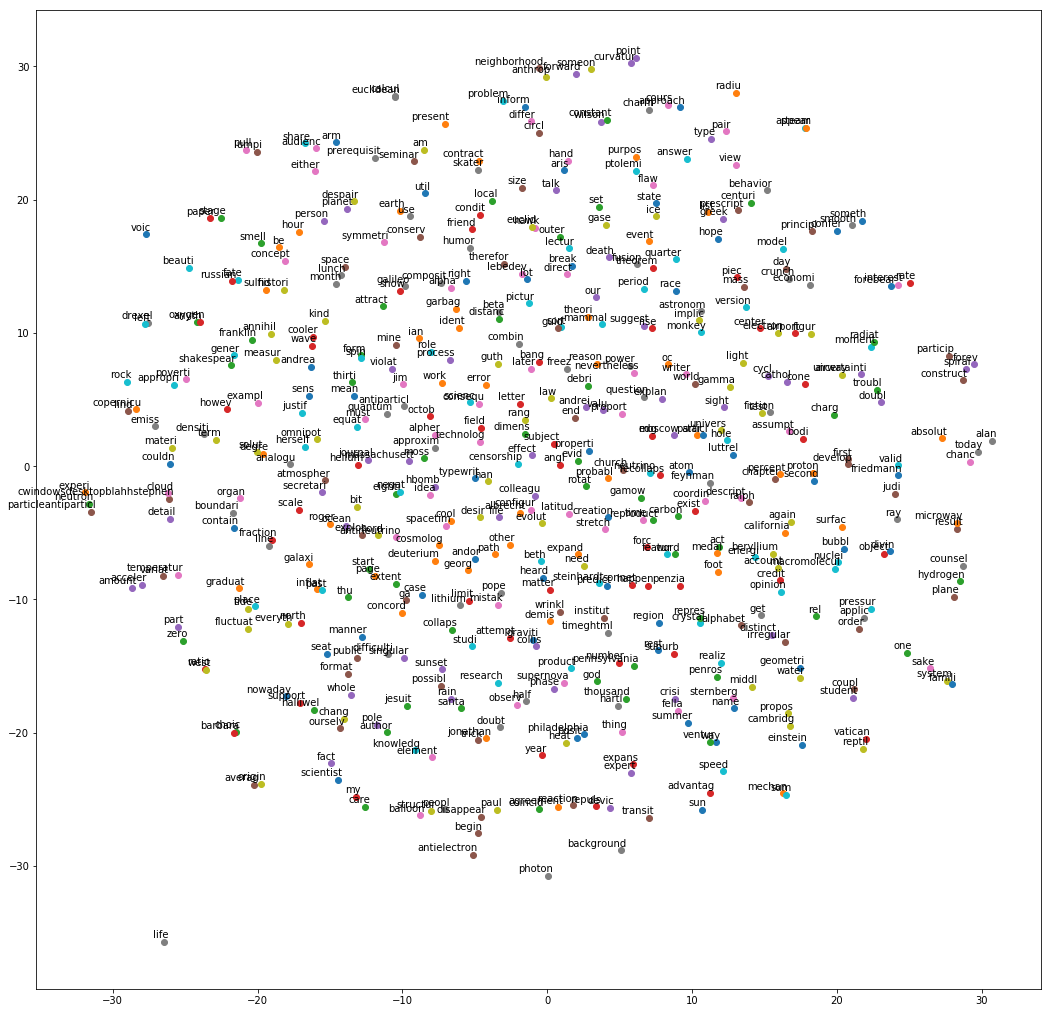

In [13]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(
        labels), 'More labels than embeddings'
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=30, n_components=2,
            init='pca', n_iter=500, method='exact')
n_embeddings = 500
low_dim_embeddings = tsne.fit_transform(final_embeddings[:n_embeddings, :])
labels = [bhot.vocabId2Word[i] for i in range(n_embeddings)]

plot_with_labels(low_dim_embeddings, labels)

Using TensorFlow backend.
